# DBSCAN - Clustering

## Dados Random como exmeplo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

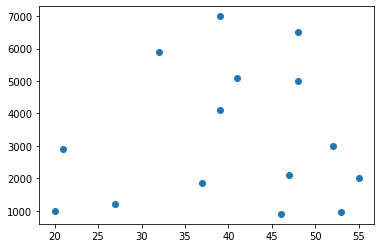

In [2]:
x=[20,  27,  21,  37,  46, 53, 55,  47,  52,  32,  39,  41,  39,  48,  48]  
y=[1000,1200,2900,1850,900,950,2000,2100,3000,5900,4100,5100,7000,5000,6500]  

base = np.array([[20,1000],[27,1200],[21,2900],[37,1850],[46,900],
                 [53,950],[55,2000],[47,2100],[52,3000],[32,5900],
                 [39,4100],[41,5100],[39,7000],[48,5000],[48,6500]])

plt.scatter(x,y)

In [3]:
scaler = StandardScaler()
base = scaler.fit_transform(base)

In [4]:
dbscan = DBSCAN(eps = 0.95, min_samples = 2)
dbscan.fit(base)
previsoes = dbscan.labels_

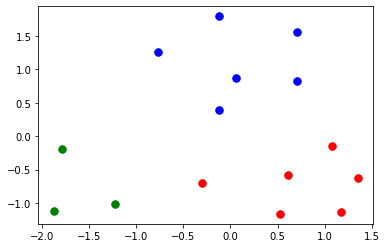

In [5]:
cores = ["g.", "r.", "b."]
for i in range(len(base)):
    plt.plot(base[i][0], base[i][1], cores[previsoes[i]], markersize = 15)

## Base crédito

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

file_path = "../../files/"

In [16]:
base = pd.read_csv(file_path + 'credit_card_clients.csv', header = 1)
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [17]:
X = base.iloc[:,[1,25]].values

In [18]:
X

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]], dtype=int64)

In [19]:
X.shape

(30000, 2)

In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Classificador `DBSCAN`

Nesse algoritmo você tem que fazer um `tuning` nos paraâmetros, ou seja, você deve testar vários parÂmetros diferentes para se obter um bom número de clustesrs

Parâmetros:

`eps`:

`min_samples`: quantidade mínima por cluster


----

DOC SKLEARN

epsfloat, default=0.5
The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

min_samplesint, default=5
The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

metricstring, or callable, default=’euclidean’
The metric to use when calculating distance between instances in a feature array. If metric is a string or callable, it must be one of the options allowed by sklearn.metrics.pairwise_distances for its metric parameter. If metric is “precomputed”, X is assumed to be a distance matrix and must be square. X may be a Glossary, in which case only “nonzero” elements may be considered neighbors for DBSCAN.

New in version 0.17: metric precomputed to accept precomputed sparse matrix.

metric_paramsdict, default=None
Additional keyword arguments for the metric function.

New in version 0.19.

algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors. See NearestNeighbors module documentation for details.

leaf_sizeint, default=30
Leaf size passed to BallTree or cKDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

pfloat, default=None
The power of the Minkowski metric to be used to calculate distance between points.

n_jobsint or None, default=None
The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

In [21]:
dbscan = DBSCAN(eps = 0.37, min_samples = 4)

In [22]:
previsoes = dbscan.fit_predict(X)
unicos, quantidade = np.unique(previsoes, return_counts = True)

`unicos` é a quantidade de grupos e `quantidade` é a quantidade para cada um.

O grupo `-1` é um grupode de ruido (pesquisar mais isso)

In [28]:
unicos

array([-1,  0,  1,  2])

In [29]:
quantidade

array([   42, 29931,    18,     9])

### Plotando Gráficos de Clusters

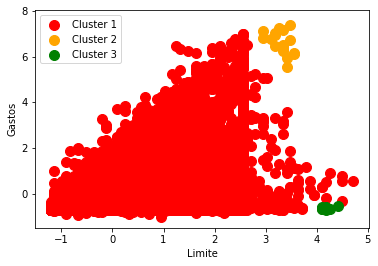

In [27]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()

In [13]:
# Concatenaçâo da base com as previsoes
lista_clientes = np.column_stack((base, previsoes))
lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]

NÂO TEM  English ML-AZ - DBSCAN

## Avalaiando os algoritmos de Agrupemento

K-MEANS, Hierarquico e DBSCAN

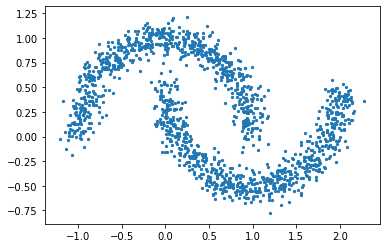

In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import datasets
import numpy as np

x, y = datasets.make_moons(n_samples = 1500, noise = 0.09)
plt.scatter(x[:, 0], x[:, 1], s = 5)

cores = np.array(['red', 'blue'])

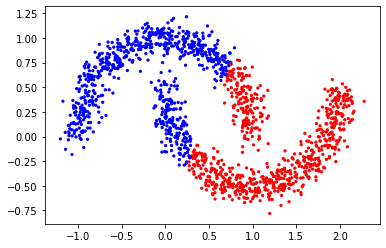

In [31]:
kmeans = KMeans(n_clusters = 2)
previsoes = kmeans.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], s = 5, color = cores[previsoes])

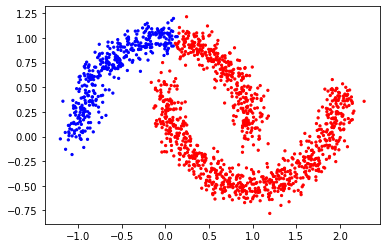

In [32]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
previsoes = hc.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], s = 5, color = cores[previsoes])

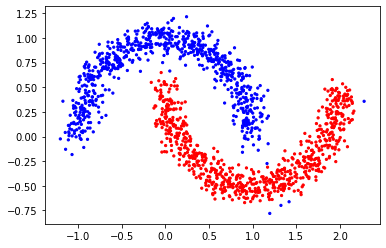

In [33]:
dbscan = DBSCAN(eps = 0.1)
previsoes = dbscan.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], s = 5, color = cores[previsoes])

Em base de dados bem separadas como essa o `DBSCAN` se adapta bem melhor